## Drive Mount

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

os.chdir('/content/drive/MyDrive/大學/深度學習基礎概論/AI_CUP')



Mounted at /content/drive/


## local runtime

In [2]:
import os
os.getcwd()

'/content/drive/MyDrive/大學/深度學習基礎概論/AI_CUP'

In [ ]:
%cd AI_CUP

/home/0812509/AI_CUP


## Dependencies
- torch

In [3]:
import torch
import torchaudio
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import numpy as np
import seaborn as sns

In [4]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    print(num_channels)
    print(num_frames)
    time_axis = torch.arange(0, num_frames) / sample_rate


    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        # five_sec = np.zeros((5, 6))
        # five_sec[:,:] = waveform[c].copy() / sample_rate
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.xlim([0, 5])
    plt.ylim([-1, 1])
    plt.show(block=False)

44100
1
88200


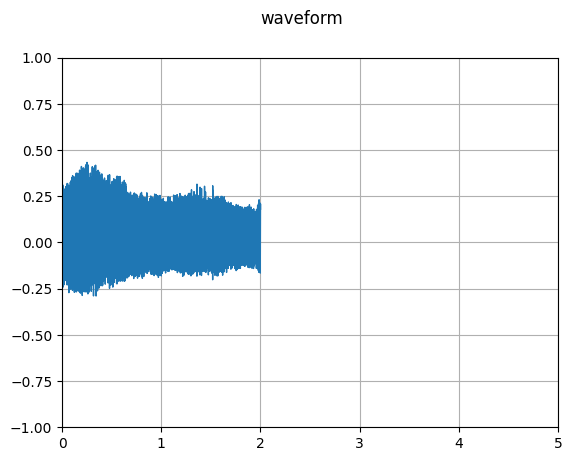

1
132300


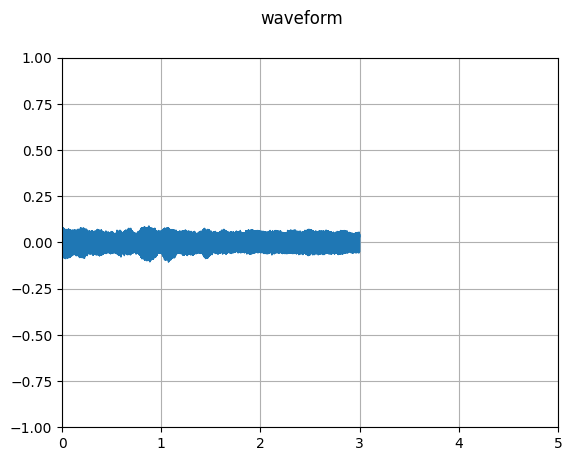

In [5]:
# sample_rate: 44100

signal_1, sr = torchaudio.load(f"./data/training_data/00002mg.wav")
# The audio data consist of two things-
# Sound: sequence of vibrations in varying pressure strengths (y)
# Sample Rate: (sr) is the number of samples of audio carried per second, measured in Hz or kHz
print(sr)
plot_waveform(signal_1, sr)

signal_2, sr = torchaudio.load(f"./data/training_data/00003h4.wav")

plot_waveform(signal_2, sr)


## Read CSV

In [6]:
import pandas as pd

def read_csv(path, train):
  source_df = pd.read_csv(path)
  medical_df = medical_data_proccessing(source_df, train)
  print(medical_df.head())
  return medical_df

In [51]:
def medical_data_proccessing(df, train):
    if train:
    # 這邊要加入ID  用於轉換資料時對應
      medical_col = ['ID', 'Sex', 'Age', 'Narrow pitch range',
                  'Decreased volume', 'Fatigue', 'Dryness', 'Lumping', 'heartburn',
                  'Choking', 'Eye dryness', 'PND', 'Smoking', 'PPD', 'Drinking',
                  'frequency', 'Diurnal pattern', 'Onset of dysphonia ', 'Noise at work',
                  'Occupational vocal demand','Head injury', 'CVA',
                  'Voice handicap index - 10', 'Disease category']
      
      df = df.loc[df['Disease category'].isin([1, 2, 3, 4,5]), medical_col]
    if train == False:
      medical_col = ['ID', 'Sex', 'Age', 'Narrow pitch range',
                  'Decreased volume', 'Fatigue', 'Dryness', 'Lumping', 'heartburn',
                  'Choking', 'Eye dryness', 'PND', 'Smoking', 'PPD', 'Drinking',
                  'frequency', 'Diurnal pattern', 'Onset of dysphonia ', 'Noise at work',
                  'Occupational vocal demand','Head injury', 'CVA',
                  'Voice handicap index - 10']
      df = df[medical_col]
    # 將性別編碼0,1
    df['Sex'] = df['Sex'] - 1

    # 將空值填0
    df['PPD'] = df['PPD'].fillna(0)
    df['Voice handicap index - 10'] = df['Voice handicap index - 10'].fillna(0)

    # 正規化過大的數值
    df['Age'] = df['Age'] / 50
    df['Voice handicap index - 10'] = df['Voice handicap index - 10'] / 40

    return df

In [52]:
medical_df = read_csv("./data/training_datalist.csv", True)


        ID  Sex   Age  Narrow pitch range  Decreased volume  Fatigue  Dryness  \
0  1202f15    1  0.78                   1                 1        1        1   
1  0600ve0    0  1.38                   1                 1        1        1   
2  1001o7l    1  1.18                   1                 1        1        1   
3  1201c1t    1  0.94                   1                 0        1        1   
4  0402jvt    0  1.74                   0                 0        0        0   

   Lumping  heartburn  Choking  ...  Drinking  frequency  Diurnal pattern  \
0        1          0        0  ...         0          0                4   
1        0          0        1  ...         0          0                3   
2        0          0        1  ...         0          0                4   
3        1          0        0  ...         0          0                1   
4        0          0        0  ...         0          0                4   

   Onset of dysphonia   Noise at work  Occupationa

In [ ]:
medical_df.columns

Index(['ID', 'Sex', 'Age', 'Narrow pitch range', 'Decreased volume', 'Fatigue',
       'Dryness', 'Lumping', 'heartburn', 'Choking', 'Eye dryness', 'PND',
       'Smoking', 'PPD', 'Drinking', 'frequency', 'Diurnal pattern',
       'Onset of dysphonia ', 'Noise at work', 'Occupational vocal demand',
       'Head injury', 'CVA', 'Voice handicap index - 10', 'Disease category'],
      dtype='object')

## Split Train and Test dataframe

In [53]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(medical_df, test_size=0.2, random_state=333)

print("training_df shape :", train_df.shape, ", val_df shape :", val_df.shape)

training_df shape : (800, 24) , val_df shape : (200, 24)


In [54]:
test_medical = read_csv("./test_data/test_datalist_private.csv", False)

        ID  Sex   Age  Narrow pitch range  Decreased volume  Fatigue  Dryness  \
0  0U02g8u    1  1.54                   0                 1        0        1   
1  0Y00jid    1  1.36                   0                 0        1        1   
2  0R02296    0  0.76                   0                 1        0        1   
3  0W016c9    0  1.16                   0                 1        1        0   
4  11006gd    1  1.50                   0                 1        1        0   

   Lumping  heartburn  Choking  ...  PPD  Drinking  frequency  \
0        0          0        0  ...  0.0         0          0   
1        1          0        1  ...  0.0         0          0   
2        1          0        0  ...  0.0         0          0   
3        1          0        0  ...  0.0         0          0   
4        1          0        0  ...  0.0         0          0   

   Diurnal pattern  Onset of dysphonia   Noise at work  \
0                4                    3              1   
1     

<ipython-input-51-4eb438e3003c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'] - 1
<ipython-input-51-4eb438e3003c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPD'] = df['PPD'].fillna(0)
<ipython-input-51-4eb438e3003c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

## Create STFT Images from AUDIOs
- map audio paths from row ID

In [11]:
from skimage.transform import resize
import gc
def save_stft(mode,df,path,sr,augment=True,power=1.5,shape=(256,512),expand_dim=True):
      data = {'mel-stft': []}
      stfts = []
      if mode == 'train' or mode == 'val':
          data['labels'] = []
          labels = []

      #loading audio files:
      for i,row in df.iterrows():
          # try:
            if mode == 'train' or mode == 'val':
                label=row['Disease category']
                labels.append(label)
              
            print('mapping file id to wav files ...')            
            rec_id=row['ID']
            print('rec_id', rec_id)
            
            filepath=os.path.join(path, f'{rec_id}.wav')
            print('filepath', filepath)
            signal,sr=librosa.load(filepath,sr=sr)

  
            #spectrogram
            stft = librosa.feature.melspectrogram(y=signal, sr=sr,n_mels=shape[0],power=power,fmin=0,fmax=14000)
            stft_db=librosa.core.amplitude_to_db(np.abs(stft))

            #reshape:
            stft_db= resize(stft_db,shape)

            #expand_dims
            if expand_dim==True:
                stft_db=np.stack((stft_db,stft_db,stft_db))

            #appending labels and stfts to lists :
            stfts.append(stft_db)

      data['mel-stft']=stfts
      if mode =='train' or mode == 'val':
          data['label']=labels
      print('STFTs extracted')
   
      return data



In [69]:
audio_directories = {'train': './data/training_data',
                     'val': './data/training_data',
                     'test': './test_data/test_data_private'}
sr = 44100

medical_dataframes = {'train': train_df,
                      'val': val_df,
                      'test':test_medical}

audio_stft = {}
for version_audio, version_medical in zip(audio_directories, medical_dataframes):
    audio_dir = audio_directories[version_audio]
    medical_df = medical_dataframes[version_medical]
    audio_stft[version_audio] = save_stft(mode=version_audio, df=medical_df, path=audio_dir, sr=sr, augment=False, power=2)

mapping file id to wav files ...
rec_id 1101uri
filepath ./data/training_data/1101uri.wav
mapping file id to wav files ...
rec_id 1101ba4
filepath ./data/training_data/1101ba4.wav
mapping file id to wav files ...
rec_id 0T000fb
filepath ./data/training_data/0T000fb.wav
mapping file id to wav files ...
rec_id 1102jjq
filepath ./data/training_data/1102jjq.wav
mapping file id to wav files ...
rec_id 120057l
filepath ./data/training_data/120057l.wav
mapping file id to wav files ...
rec_id 1302358
filepath ./data/training_data/1302358.wav
mapping file id to wav files ...
rec_id 09013qq
filepath ./data/training_data/09013qq.wav
mapping file id to wav files ...
rec_id 1202n51
filepath ./data/training_data/1202n51.wav
mapping file id to wav files ...
rec_id 12017m3
filepath ./data/training_data/12017m3.wav
mapping file id to wav files ...
rec_id 0502mfl
filepath ./data/training_data/0502mfl.wav
mapping file id to wav files ...
rec_id 1100pv9
filepath ./data/training_data/1100pv9.wav
mapping fi

In [70]:
audio_stft['train']['mel-stft'][0].shape

(3, 256, 512)

In [71]:
len(audio_stft['train']['mel-stft'])

800

In [72]:
len(audio_stft['val']['mel-stft'])

200

In [73]:
len(audio_stft['test']['mel-stft'])

500

## Custom CNN

In [17]:
import tensorflow as tf
import tensorflow.keras as keras

In [18]:
@tf.function
def _one_sample_positive_class_precisions(example):
    y_true, y_pred = example

    retrieved_classes = tf.argsort(y_pred, direction='DESCENDING')
    class_rankings = tf.argsort(retrieved_classes)
    retrieved_class_true = tf.gather(y_true, retrieved_classes)
    retrieved_cumulative_hits = tf.math.cumsum(tf.cast(retrieved_class_true, tf.float32))

    idx = tf.where(y_true)[:, 0]
    i = tf.boolean_mask(class_rankings, y_true)
    r = tf.gather(retrieved_cumulative_hits, i)
    c = 1 + tf.cast(i, tf.float32)
    precisions = r / c

    dense = tf.scatter_nd(idx[:, None], precisions, [y_pred.shape[0]])
    return dense


class LWLRAP(tf.keras.metrics.Metric):
    def __init__(self, num_classes, name='lwlrap', dtype=None):
        super().__init__(name=name)
        self.num_classes = num_classes
        
        self._precisions = self.add_weight(
            name='per_class_cumulative_precision',
            shape=[num_classes],
            initializer='zeros',
        )

        self._counts = self.add_weight(
            name='per_class_cumulative_count',
            shape=[num_classes],
            initializer='zeros',
        )
    def get_config(self):
      # https://stackoverflow.com/questions/64797096/load-keras-model-with-custom-metrics-and-custom-loss
      base_config = super().get_config()
      return {**base_config, "num_classes": self.num_classes, "name": self.name}
    def update_state(self, y_true, y_pred, sample_weight=None):
        precisions = tf.map_fn(
            fn=_one_sample_positive_class_precisions,
            elems=(y_true, y_pred),
            dtype=(tf.float32),
        )

        increments = tf.cast(precisions > 0, tf.float32)
        total_increments = tf.reduce_sum(increments, axis=0)
        total_precisions = tf.reduce_sum(precisions, axis=0)

        self._precisions.assign_add(total_precisions)
        self._counts.assign_add(total_increments)        

    def result(self):
        per_class_lwlrap = self._precisions / tf.maximum(self._counts, 1.0)
        per_class_weight = self._counts / tf.reduce_sum(self._counts)
        overall_lwlrap = tf.reduce_sum(per_class_lwlrap * per_class_weight)
        return overall_lwlrap

    def reset_states(self):
        self._precisions.assign(self._precisions * 0)
        self._counts.assign(self._counts * 0)

In [19]:
#Custom CNN Model:
from tensorflow.keras import layers

def build_model(stft_images):
    inp=layers.Input(shape=(stft_images.shape[1:]))
    
    x=layers.Conv2D(16, strides=1,kernel_size=(7,7),padding='same')(inp)    
    x=layers.MaxPooling2D(pool_size=(2,2))(x)
    
        
    for i in range(len(filters)):
        x=layers.Conv2D(filters[i], strides=stride[i],kernel_size=kernel[i],padding='same')(x)     
        x=layers.MaxPooling2D(pool_size=pool[i])(x)
        x=layers.Activation('relu')(x)
        x=layers.BatchNormalization()(x)
        
    x=layers.Flatten()(x)
    
    for i in range(len(dense)):
        x=layers.BatchNormalization()(x)
        x=layers.Dense(dense[i],kernel_regularizer=l2)(x)
        x=layers.Dropout(rate=drop[i])(x)
    
    x=layers.BatchNormalization()(x)
    output=layers.Dense(5,activation='softmax')(x)
    
    model=keras.Model(inputs=inp,outputs=output)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model.to(device)
    
    return model

## SETUP MODEL

- build model

In [ ]:
torch.cuda.is_available()

True

## preprocess data
1. min-max-transform audio data
2. shape of audio stfts: (num_of_audios, width:256, height:512, channel=3)

In [88]:
from sklearn.preprocessing import MinMaxScaler

def normalize_audios(audio_dataset, mode, num_of_class):
    x = np.array(audio_dataset['mel-stft'])
    shape = x.shape

    x = MinMaxScaler().fit_transform(x.reshape(-1, x.shape[-1])).reshape(shape)
    x = x.reshape(x.shape[0], x.shape[2], x.shape[3], x.shape[1])
    print('mode',x.shape)
    if mode == 'train' or mode == 'val':
      y = np.array(audio_dataset['label'])
      y = keras.utils.to_categorical(y-1, num_classes=num_of_class)
      return x, y
      
    return x
      

In [89]:
audio_train = normalize_audios(audio_stft['train'], 'train', 5)
audio_val = normalize_audios(audio_stft['val'], 'val', 5)
audio_test = normalize_audios(audio_stft['test'], 'test', 5)

mode (800, 256, 512, 3)
mode (200, 256, 512, 3)
mode (500, 256, 512, 3)


In [22]:
from keras import layers
#model_architecture:
l2=keras.regularizers.l2(1e-3)
filters=[128,256,512,1024]        #conv filters
kernel=[(5,5),(3,3),(3,3),(3,3)]  #kernel size
stride=[1,1,1,1]                  #stride length 
pool=[(2,2),(2,2),(2,2),(2,2)]    # max-pooling size
dense=[256,128,64]                # dense layers 256,64
drop=[0.8,0.7,0.5]                #dropout probabilities


In [ ]:
import tensorflow


In [90]:
audio_model = build_model(audio_train[0])

In [75]:
filepath1 = "./model_checkpoints/CustomCNN.hdf5"

- load model

In [ ]:
filepath1 = "./model_checkpoints/CustomCNN.hdf5"
load_cnn= keras.models.load_model(filepath1, custom_objects={"LWLRAP": LWLRAP})

In [91]:


#params:
Epochs1=200
batch_size1=16


# cnn_model2=build_model()

#compiling model
audio_model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
               ,loss='categorical_crossentropy',metrics=[LWLRAP(5)])

#callbacks:
#reduce_lr
reduce_lr=keras.callbacks.ReduceLROnPlateau(patience=3,factor=0.75,monitor='val_loss',verbose=0,min_lr=1e-8)

#early stopping
early_stopping=keras.callbacks.EarlyStopping(patience=10,min_delta=1e-3,monitor='val_loss')

#save model :
checkpoint1 =keras.callbacks.ModelCheckpoint(filepath1, monitor='val_lwlrap', verbose=1,
                                                save_best_only=True, mode='max')    

gc.collect()

12976

In [92]:
# coninue fitting 

audio_history=audio_model.fit(audio_train[0], audio_train[1],validation_split=0.05,callbacks=[reduce_lr, checkpoint1, early_stopping],verbose=1,
                   epochs=Epochs1,batch_size=batch_size1,shuffle=True)

gc.collect()

Epoch 1/200
48/48 [==============================] - ETA: 0s - loss: 9.8048 - lwlrap: 0.5768

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric LWLRAP implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()



Epoch 1: val_lwlrap improved from -inf to 0.49333, saving model to ./model_checkpoints/CustomCNN.hdf5
48/48 [==============================] - 31s 456ms/step - loss: 9.8048 - lwlrap: 0.5768 - val_loss: 107.7470 - val_lwlrap: 0.4933 - lr: 0.0100
Epoch 2/200
48/48 [==============================] - ETA: 0s - loss: 7.2128 - lwlrap: 0.6907
Epoch 2: val_lwlrap did not improve from 0.49333
48/48 [==============================] - 8s 174ms/step - loss: 7.2128 - lwlrap: 0.6907 - val_loss: 11.7124 - val_lwlrap: 0.4787 - lr: 0.0100
Epoch 3/200
48/48 [==============================] - ETA: 0s - loss: 4.3114 - lwlrap: 0.6986
Epoch 3: val_lwlrap improved from 0.49333 to 0.60583, saving model to ./model_checkpoints/CustomCNN.hdf5
48/48 [==============================] - 11s 232ms/step - loss: 4.3114 - lwlrap: 0.6986 - val_loss: 3.5953 - val_lwlrap: 0.6058 - lr: 0.0100
Epoch 4/200
48/48 [==============================] - ETA: 0s - loss: 3.3783 - lwlrap: 0.6951
Epoch 4: val_lwlrap improved from 0.605

9995

In [78]:
#plotting history:
def plot_history(history):
    his=pd.DataFrame(history.history)
    plt.subplots(1,2,figsize=(16,8))
    
    #loss:
    plt.subplot(1,2,1)
    plt.plot(range(len(his)),his['loss'],color='g',label='training')
    plt.plot(range(len(his)),his['val_loss'],color='r',label='validation')
    plt.legend()
    plt.title('Loss')
    
    plt.subplot(1,2,2)
    plt.plot(range(len(his)),his['lwlrap'],color='g',label='training')
    plt.plot(range(len(his)),his['val_lwlrap'],color='r',label='validation')
    plt.legend()
    plt.title('accuracy')
    
    plt.show()         

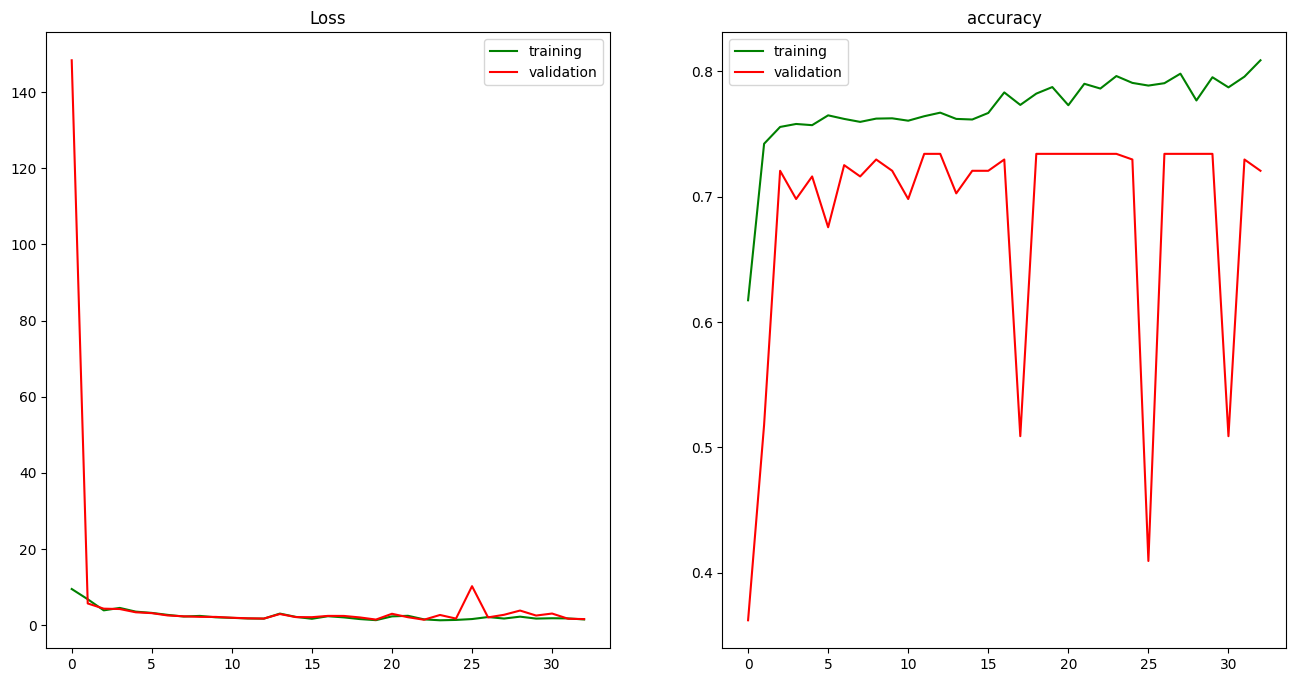

In [79]:
plot_history(audio_history)

In [93]:
# coninue fitting 

audio_history=audio_model.fit(audio_val[0], audio_val[1],validation_split=0.05,callbacks=[reduce_lr, checkpoint1, early_stopping],verbose=1,
                   epochs=50,batch_size=batch_size1,shuffle=True)

gc.collect()

Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 2.7169 - lwlrap: 0.7472
Epoch 1: val_lwlrap improved from 0.66708 to 0.78333, saving model to ./model_checkpoints/CustomCNN.hdf5
12/12 [==============================] - 11s 959ms/step - loss: 2.7169 - lwlrap: 0.7472 - val_loss: 2.6583 - val_lwlrap: 0.7833 - lr: 0.0024
Epoch 2/50
12/12 [==============================] - ETA: 0s - loss: 2.7638 - lwlrap: 0.7501
Epoch 2: val_lwlrap did not improve from 0.78333
12/12 [==============================] - 2s 176ms/step - loss: 2.7638 - lwlrap: 0.7501 - val_loss: 2.6611 - val_lwlrap: 0.7333 - lr: 0.0024
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 2.7147 - lwlrap: 0.7492
Epoch 3: val_lwlrap did not improve from 0.78333
12/12 [==============================] - 2s 181ms/step - loss: 2.7147 - lwlrap: 0.7492 - val_loss: 2.5983 - val_lwlrap: 0.7333 - lr: 0.0024
Epoch 4/50
12/12 [==============================] - ETA: 0s - loss: 2.6104 - lwlrap: 0.7533
Epoch 4:

6160

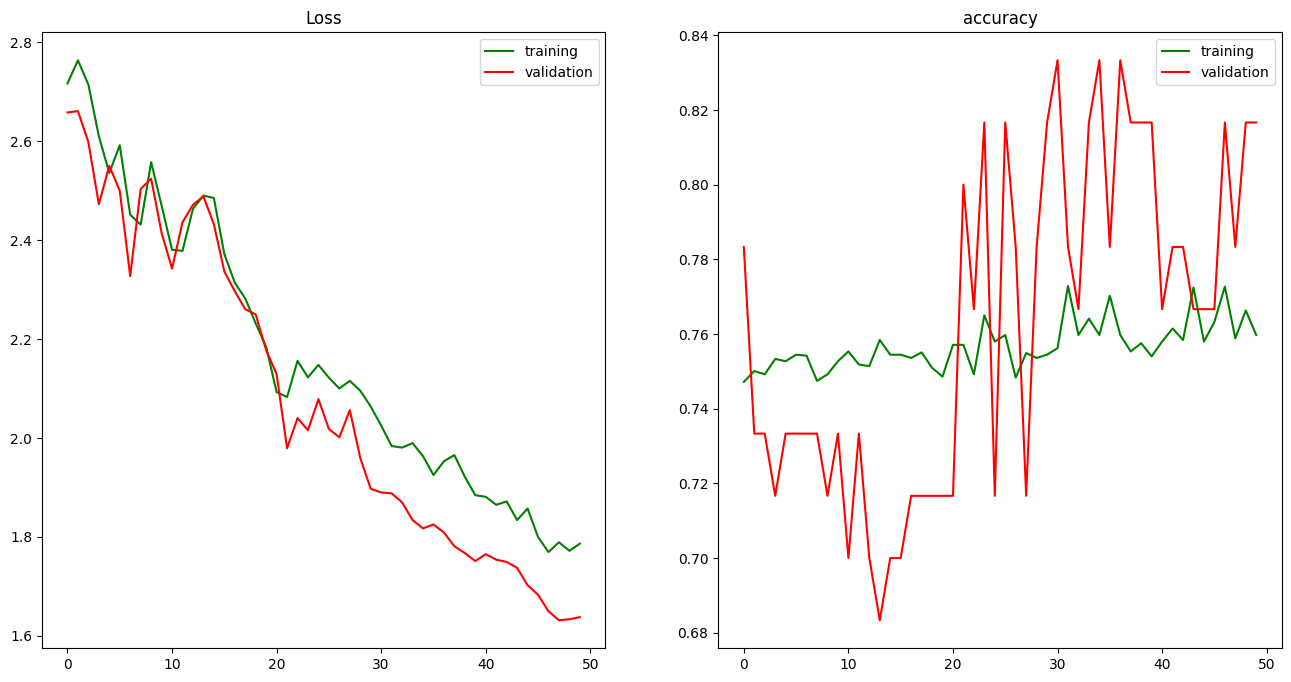

In [94]:
plot_history(audio_history)

In [95]:
audio_model.save(filepath1)

## continue to train val

In [96]:
pred_audio = audio_model.predict(audio_val[0])


7/7 [==============================] - 1s 119ms/step


In [97]:
pred_audio.shape

(200, 5)

In [37]:
import numpy as np
import pandas as pd
import librosa

import tensorflow as tf
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, LayerNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [38]:
# default hyperparameters
NEURONS = 300
HIDDEN_LAYERS = 3

def create_DNN(input_shape, neurons = NEURONS, hidden_layers = HIDDEN_LAYERS, learning_rate = 0.001, verbose=0):
    model = Sequential()

    model.add(Dense(neurons, input_dim=input_shape))
    model.add(Activation('sigmoid'))

    for i in range(hidden_layers-1):
        model.add(Dense(neurons))
        model.add(Activation('sigmoid'))


    model.add(Dense(5))
    model.add(Activation('softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # categorical_crossentropy

    if verbose:
        model.summary()
    
    return model

## Medical Data
- reset index
- exclude Disease category

In [ ]:
# { (some_key if condition else default_key):(something_if_true if condition
# else something_if_false) for key, value in dict_.items() }

In [62]:
def map_category_df(df, num_of_class):
  df = df.reset_index(drop=True)
  df_ = df.iloc[:, :-1]
  for i in range(1,num_of_class+1):
      col = f'c{i}'
      # df['c1'] = df['Disease category'].map({1:1, 2:0, 3:0, 4:0, 5:0})
      # df['c2'] = df["Disease category"].map({1:0, 2:1, 3:0, 4:0, 5:0})
      # df['c3'] = df["Disease category"].map({1:0, 2:0, 3:1, 4:0, 5:0})
      # df['c4'] = df["Disease category"].map({1:0, 2:0, 3:0, 4:1, 5:0})
      # df['c5'] = df["Disease category"].map({1:0, 2:0, 3:0, 4:0, 5:1})
      one_hot= { j: (1 if j==i else 0 ) for j in range(1, num_of_class+1)}
      df_[col] = df['Disease category'].map(one_hot)
  return df_

In [98]:
train_medi = map_category_df(train_df, 5)
val_medi = map_category_df(val_df, 5)

In [99]:
train_df.head()

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Drinking,frequency,Diurnal pattern,Onset of dysphonia,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,Disease category
711,1101uri,1,0.92,0,1,1,1,1,0,0,...,0,0,4,2,1,3,0,0,0.625,1
772,1101ba4,0,0.70,0,0,1,1,0,0,0,...,2,1,3,4,1,3,0,0,0.500,2
12,0T000fb,1,0.98,1,0,1,1,0,0,0,...,0,0,3,3,3,2,0,0,0.650,5
510,1102jjq,1,1.38,0,0,0,0,0,0,0,...,0,0,3,5,1,1,0,0,0.000,2
400,120057l,1,0.72,0,0,1,0,0,0,0,...,0,0,4,2,1,1,0,0,0.575,2


In [100]:
train_medi.head()

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,c1,c2,c3,c4,c5
0,1101uri,1,0.92,0,1,1,1,1,0,0,...,1,3,0,0,0.625,1,0,0,0,0
1,1101ba4,0,0.70,0,0,1,1,0,0,0,...,1,3,0,0,0.500,0,1,0,0,0
2,0T000fb,1,0.98,1,0,1,1,0,0,0,...,3,2,0,0,0.650,0,0,0,0,1
3,1102jjq,1,1.38,0,0,0,0,0,0,0,...,1,1,0,0,0.000,0,1,0,0,0
4,120057l,1,0.72,0,0,1,0,0,0,0,...,1,1,0,0,0.575,0,1,0,0,0


In [101]:
train_medi.shape

(800, 28)

In [102]:
medical_model = create_DNN(input_shape = train_medi.iloc[:,1:-5].shape[1], verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 300)               6900      
                                                                 
 activation_28 (Activation)  (None, 300)               0         
                                                                 
 dense_29 (Dense)            (None, 300)               90300     
                                                                 
 activation_29 (Activation)  (None, 300)               0         
                                                                 
 dense_30 (Dense)            (None, 300)               90300     
                                                                 
 activation_30 (Activation)  (None, 300)               0         
                                                                 
 dense_31 (Dense)            (None, 5)                

In [ ]:
X = np.concatenate((X_val, X_test), axis=0)
X.shape

(924, 256, 512, 3)

## pure medical dataset

In [120]:
MODEL_SAVE_NAME = "AI_CUP_medical_sample_model"



medical_results = medical_model.fit(train_medi.iloc[:, 1:-5], train_medi.iloc[:, -5:], batch_size=16, epochs=100, 
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='auto'),
                                         ModelCheckpoint(MODEL_SAVE_NAME+".h5", save_best_only=True)], 
                              validation_data=(val_medi.iloc[:, 1:-5], val_medi.iloc[:, -5:]))

Epoch 1/100
50/50 [==============================] - 3s 27ms/step - loss: 1.3276 - accuracy: 0.4850 - val_loss: 1.2309 - val_accuracy: 0.5850
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 1.2486 - accuracy: 0.5250 - val_loss: 1.1351 - val_accuracy: 0.5850
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 1.1985 - accuracy: 0.5362 - val_loss: 1.0591 - val_accuracy: 0.6650
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 1.1215 - accuracy: 0.5625 - val_loss: 0.9294 - val_accuracy: 0.6400
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 1.0632 - accuracy: 0.5938 - val_loss: 0.9541 - val_accuracy: 0.6450
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 1.0560 - accuracy: 0.5850 - val_loss: 0.8788 - val_accuracy: 0.6500
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 1.0401 - accuracy: 0.5813 - val_loss: 0.8823 - val_accuracy: 0.6500
Epoch 8/100


In [126]:
medi_pred = medical_model.predict(pd.concat((train_medi.iloc[:, 1:-5], val_medi.iloc[:, 1:-5]))).argmax(axis=1)
print(medi_pred.shape)
print(medi_pred[:5])


32/32 [==============================] - 0s 2ms/step
(1000,)
[0 1 0 0 0]


In [128]:
train_df.head()

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Drinking,frequency,Diurnal pattern,Onset of dysphonia,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,Disease category
711,1101uri,1,0.92,0,1,1,1,1,0,0,...,0,0,4,2,1,3,0,0,0.625,1
772,1101ba4,0,0.70,0,0,1,1,0,0,0,...,2,1,3,4,1,3,0,0,0.500,2
12,0T000fb,1,0.98,1,0,1,1,0,0,0,...,0,0,3,3,3,2,0,0,0.650,5
510,1102jjq,1,1.38,0,0,0,0,0,0,0,...,0,0,3,5,1,1,0,0,0.000,2
400,120057l,1,0.72,0,0,1,0,0,0,0,...,0,0,4,2,1,1,0,0,0.575,2


32/32 [==============================] - 0s 2ms/step
Training UAR(Unweighted Average Recall) : 0.344222394520902


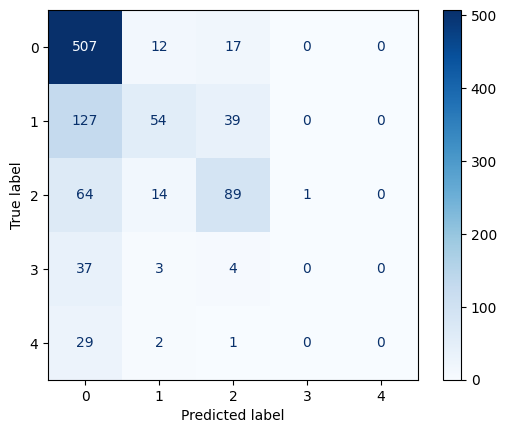

In [132]:
medi_pred = medical_model.predict(pd.concat((train_medi.iloc[:, 1:-5], val_medi.iloc[:, 1:-5]))).argmax(axis=1)
medi_true = pd.concat((train_df.iloc[:, -1], val_df.iloc[:, -1]), axis=0)
results_recall = recall_score(medi_true-1, medi_pred, average=None)
print("Training UAR(Unweighted Average Recall) :", results_recall.mean())
ConfusionMatrixDisplay(confusion_matrix(medi_true-1, medi_pred)).plot(cmap='Blues')

In [46]:
def second_state_processing(audio_frames, medical_df, acoustic_model):
  # concatenate audio features behind
  frame_pred = acoustic_model.predict(audio_frames)

  all_features = medical_df.iloc[:, :23] # include id, not label
  all_features["audio_feat1"] = frame_pred[:, 0]
  all_features["audio_feat2"] = frame_pred[:, 1]
  all_features["audio_feat3"] = frame_pred[:, 2]
  all_features["audio_feat4"] = frame_pred[:, 3]
  all_features["audio_feat5"] = frame_pred[:, 4]

  # one-hot labels

  categorical_labels = medical_df.iloc[:, -5:]
  
  
  return all_features, categorical_labels

In [103]:
X_all = np.concatenate((audio_train[0], audio_val[0]), axis=0)
train_all_medi = pd.concat((train_medi, val_medi), axis=0)

train_feats, train_labels = second_state_processing(X_all, train_all_medi, audio_model)

train_y = np.concatenate((train_df.iloc[:,-1], val_df.iloc[:,-1]))
print("============ second processed ===========")
print("train_feats", train_feats)
print("train categorical labels", train_labels)
print("train labels", train_y)

32/32 [==============================] - 3s 110ms/step
============ second processed ===========
train_feats           ID  Sex   Age  Narrow pitch range  Decreased volume  Fatigue  \
0    1101uri    1  0.92                   0                 1        1   
1    1101ba4    0  0.70                   0                 0        1   
2    0T000fb    1  0.98                   1                 0        1   
3    1102jjq    1  1.38                   0                 0        0   
4    120057l    1  0.72                   0                 0        1   
..       ...  ...   ...                 ...               ...      ...   
195  0902d6j    1  1.20                   0                 0        0   
196  13005st    1  1.12                   0                 0        0   
197  0T022un    0  1.04                   1                 1        0   
198  04029np    1  1.32                   0                 0        0   
199  12003p4    1  0.98                   0                 0        0   

  

In [106]:
test_feats, test_labels = second_state_processing(audio_test, test_medical, audio_model)
test_y = test_medical.iloc[:, -1]
print("============ second processed ===========")
print("test feats",test_feats)
print("test labels", test_labels)
print("test_y", test_y)

16/16 [==============================] - 2s 113ms/step
============ second processed ===========
test feats           ID  Sex   Age  Narrow pitch range  Decreased volume  Fatigue  \
0    0U02g8u    1  1.54                   0                 1        0   
1    0Y00jid    1  1.36                   0                 0        1   
2    0R02296    0  0.76                   0                 1        0   
3    0W016c9    0  1.16                   0                 1        1   
4    11006gd    1  1.50                   0                 1        1   
..       ...  ...   ...                 ...               ...      ...   
495  1001abu    1  0.58                   1                 1        1   
496  1002ss4    1  1.54                   1                 1        0   
497  0W011bi    0  0.88                   0                 1        1   
498  0R00num    0  1.26                   0                 0        1   
499  0Y02gae    1  0.60                   1                 1        0   

   

In [ ]:
test_y

0      0.350
1      0.200
2      0.625
3      0.850
4      0.700
       ...  
495    0.975
496    0.525
497    0.675
498    1.000
499    0.425
Name: Voice handicap index - 10, Length: 500, dtype: float64

In [107]:
from sklearn.preprocessing import StandardScaler

StandScaler =  StandardScaler()
standarded_train_feats = StandScaler.fit_transform(train_feats.iloc[:, 1:])
standarded_train_feats

array([[ 0.77956208, -0.17207687, -0.89181396, ..., -0.99746453,
        -1.81851499,  1.20265329],
       [-1.28277147, -0.89619528, -0.89181396, ..., -0.73553626,
        -1.10901471,  1.02677253],
       [ 0.77956208,  0.02540997,  1.1213101 , ..., -0.05737296,
         0.10070188,  0.32336629],
       ...,
       [-1.28277147,  0.22289681,  1.1213101 , ...,  2.09653583,
         2.1527133 , -1.94769662],
       [ 0.77956208,  1.14450207, -0.89181396, ..., -0.35776089,
        -0.05384894, -0.0680617 ],
       [ 0.77956208,  0.02540997, -0.89181396, ...,  0.59721813,
         1.07500593, -0.69164798]])

In [108]:
standarded_train_feats.shape

(1000, 27)

In [109]:
dnn_model = create_DNN(input_shape = standarded_train_feats.shape[1], verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 300)               8400      
                                                                 
 activation_32 (Activation)  (None, 300)               0         
                                                                 
 dense_33 (Dense)            (None, 300)               90300     
                                                                 
 activation_33 (Activation)  (None, 300)               0         
                                                                 
 dense_34 (Dense)            (None, 300)               90300     
                                                                 
 activation_34 (Activation)  (None, 300)               0         
                                                                 
 dense_35 (Dense)            (None, 5)                

In [110]:
train_labels

,c1,c2,c3,c4,c5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
195,0,0,1,0,0
196,0,0,1,0,0
197,0,0,1,0,0
198,1,0,0,0,0


In [111]:
MODEL_SAVE_NAME = "AI_CUP_dnn_model"


train_results = dnn_model.fit(standarded_train_feats, train_labels, validation_split = 0.05, batch_size=16, epochs=100, 
                              callbacks=[
                                         ModelCheckpoint(MODEL_SAVE_NAME+".h5", save_best_only=True)], 
                              )

Epoch 1/100
60/60 [==============================] - 3s 20ms/step - loss: 1.2375 - accuracy: 0.5337 - val_loss: 0.9574 - val_accuracy: 0.6800
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.6032 - val_loss: 0.7322 - val_accuracy: 0.7600
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.9701 - accuracy: 0.6453 - val_loss: 0.7294 - val_accuracy: 0.7400
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.9512 - accuracy: 0.6484 - val_loss: 0.7192 - val_accuracy: 0.7000
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.9146 - accuracy: 0.6674 - val_loss: 0.6637 - val_accuracy: 0.8000
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.9012 - accuracy: 0.6716 - val_loss: 0.6846 - val_accuracy: 0.7800
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.8967 - accuracy: 0.6779 - val_loss: 0.7133 - val_accuracy: 0.8000
Epoch 8/100


In [112]:
train_y

array([1, 2, 5, 2, 2, 3, 4, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1,
       2, 3, 2, 3, 2, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1,
       1, 3, 1, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 5,
       2, 1, 3, 2, 1, 1, 3, 1, 3, 2, 2, 5, 3, 1, 1, 2, 3, 3, 5, 1, 2, 1,
       3, 2, 1, 3, 4, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 4, 1, 1, 3, 2, 2, 1, 3,
       1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 2,
       1, 1, 2, 1, 1, 4, 3, 1, 1, 1, 3, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 1,
       2, 1, 3, 2, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 1, 1, 1, 3, 1, 1, 3, 2,
       4, 2, 2, 5, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 4, 2, 1, 1, 2,
       3, 2, 2, 2, 1, 2, 5, 1, 4, 3, 1, 2, 2, 3, 1, 5, 3, 1, 2, 1, 3, 4,
       5, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1,
       1, 2, 4, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2,

32/32 [==============================] - 0s 2ms/step
Training UAR(Unweighted Average Recall) : 0.6872891225689732


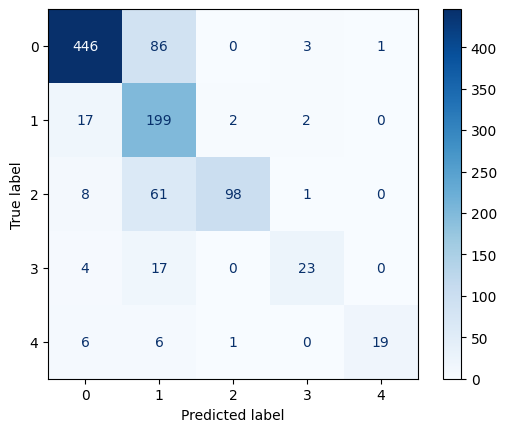

In [113]:
y_pred = dnn_model.predict(standarded_train_feats).argmax(axis=1)
y_true = train_y -1
results_recall = recall_score(y_true, y_pred, average=None)
print("Training UAR(Unweighted Average Recall) :", results_recall.mean())
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot(cmap='Blues')

In [115]:
train_df_preds = pd.concat((train_df, val_df))
train_df_preds['prediction'] = y_pred + 1
train_df_preds.head()

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,frequency,Diurnal pattern,Onset of dysphonia,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,Disease category,prediction
711,1101uri,1,0.92,0,1,1,1,1,0,0,...,0,4,2,1,3,0,0,0.625,1,1
772,1101ba4,0,0.70,0,0,1,1,0,0,0,...,1,3,4,1,3,0,0,0.500,2,2
12,0T000fb,1,0.98,1,0,1,1,0,0,0,...,0,3,3,3,2,0,0,0.650,5,2
510,1102jjq,1,1.38,0,0,0,0,0,0,0,...,0,3,5,1,1,0,0,0.000,2,2
400,120057l,1,0.72,0,0,1,0,0,0,0,...,0,4,2,1,1,0,0,0.575,2,1


In [117]:
train_df_preds = train_df_preds.reset_index(drop=True)

In [119]:
train_df_preds

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,frequency,Diurnal pattern,Onset of dysphonia,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,Disease category,prediction
0,1101uri,1,0.92,0,1,1,1,1,0,0,...,0,4,2,1,3,0,0,0.625,1,1
1,1101ba4,0,0.70,0,0,1,1,0,0,0,...,1,3,4,1,3,0,0,0.500,2,2
2,0T000fb,1,0.98,1,0,1,1,0,0,0,...,0,3,3,3,2,0,0,0.650,5,2
3,1102jjq,1,1.38,0,0,0,0,0,0,0,...,0,3,5,1,1,0,0,0.000,2,2
4,120057l,1,0.72,0,0,1,0,0,0,0,...,0,4,2,1,1,0,0,0.575,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0902d6j,1,1.20,0,0,0,0,0,0,0,...,0,3,1,1,3,0,0,0.900,3,3
996,13005st,1,1.12,0,0,0,0,0,0,1,...,1,3,1,1,4,0,0,0.775,3,3
997,0T022un,0,1.04,1,1,0,0,0,0,1,...,0,4,2,1,3,0,0,0.925,3,2
998,04029np,1,1.32,0,0,0,1,0,0,0,...,1,3,1,1,3,0,0,0.025,1,2


In [118]:
train_df_preds.to_csv("train.csv")

In [133]:
train_predictions = pd.DataFrame(train_df_preds, columns=['ID', 'prediction'])
train_predictions.to_csv("train_predictions.csv", index=False, sep=",")

In [134]:
test_medical.head()

,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,PPD,Drinking,frequency,Diurnal pattern,Onset of dysphonia,Noise at work,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10
0,0U02g8u,1,1.54,0,1,0,1,0,0,0,...,0.0,0,0,4,3,1,3,0,1,0.350
1,0Y00jid,1,1.36,0,0,1,1,1,0,1,...,0.0,0,0,3,2,1,4,0,0,0.200
2,0R02296,0,0.76,0,1,0,1,1,0,0,...,0.0,0,0,4,3,2,1,0,0,0.625
3,0W016c9,0,1.16,0,1,1,0,1,0,0,...,0.0,0,0,4,3,1,3,0,0,0.850
4,11006gd,1,1.50,0,1,1,0,1,0,0,...,0.0,0,0,3,2,1,3,0,0,0.700


In [135]:
standarded_train_feats.shape

(1000, 27)

In [136]:
test_frame_pred = audio_model.predict(audio_test)


test_features = test_medical.iloc[:, :] # include id, not label
test_features["audio_feat1"] = test_frame_pred[:, 0]
test_features["audio_feat2"] = test_frame_pred[:, 1]
test_features["audio_feat3"] = test_frame_pred[:, 2]
test_features["audio_feat4"] = test_frame_pred[:, 3]
test_features["audio_feat5"] = test_frame_pred[:, 4]
standarded_test_feats = StandScaler.transform(test_features.iloc[:, 1:])
standarded_test_feats

16/16 [==============================] - 2s 111ms/step


array([[ 0.77956208,  1.86862049, -0.89181396, ..., -0.98737211,
        -1.79921809,  1.27940669],
       [ 0.77956208,  1.27615997, -0.89181396, ...,  0.02617239,
         0.61105476, -0.52457787],
       [-1.28277147, -0.69870844, -0.89181396, ..., -0.93626648,
        -1.64686388,  1.5047263 ],
       ...,
       [-1.28277147, -0.30373476, -0.89181396, ..., -0.81471611,
        -1.32545365,  1.1282549 ],
       [-1.28277147,  0.94701523, -0.89181396, ...,  0.65764586,
         1.46086279, -1.05298371],
       [ 0.77956208, -1.22534002,  1.1213101 , ...,  0.44591709,
         0.90538679, -0.54812808]])

In [139]:
standarded_test_feats[:2]

array([[ 0.77956208,  1.86862049, -0.89181396,  1.22474487, -1.05978406,
         1.00601811, -0.77294508, -0.30478874, -0.49843701,  2.0647416 ,
        -0.56503205, -0.61458416, -0.39910167, -0.66441348, -0.59217372,
         1.11955345,  0.60296583, -0.8277203 ,  1.00368364, -0.07088812,
        12.87115638, -0.94127267,  1.24431249, -0.19575886, -0.98737211,
        -1.79921809,  1.27940669],
       [ 0.77956208,  1.27615997, -0.89181396, -0.81649658,  0.94358845,
         1.00601811,  1.29375299, -0.30478874,  2.00627157, -0.4843221 ,
        -0.56503205, -0.61458416, -0.39910167, -0.66441348, -0.59217372,
         0.14177751, -0.24868082, -0.8277203 ,  1.99058987, -0.07088812,
        -0.0776931 , -1.57377754, -0.04287431, -0.17674659,  0.02617239,
         0.61105476, -0.52457787]])

In [138]:
standarded_test_feats.shape

(500, 27)

In [137]:
y_pred = dnn_model.predict(standarded_test_feats).argmax(axis=1)
test_df_preds = test_medical
test_df_preds['prediction'] = y_pred +1 
test_df_preds.head()

16/16 [==============================] - 0s 2ms/step


,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,audio_feat1,audio_feat2,audio_feat3,audio_feat4,audio_feat5,prediction
0,0U02g8u,1,1.54,0,1,0,1,0,0,0,...,3,0,1,0.350,0.691394,0.180161,0.066278,0.043076,0.019091,2
1,0Y00jid,1,1.36,0,0,1,1,1,0,1,...,4,0,0,0.200,0.548969,0.180516,0.188043,0.070070,0.012402,2
2,0R02296,0,0.76,0,1,0,1,1,0,0,...,1,0,0,0.625,0.676933,0.185941,0.072418,0.044782,0.019926,2
3,0W016c9,0,1.16,0,1,1,0,1,0,0,...,3,0,0,0.850,0.540123,0.175611,0.199683,0.072986,0.011596,2
4,11006gd,1,1.50,0,1,1,0,1,0,0,...,3,0,0,0.700,0.369638,0.164869,0.371999,0.084763,0.008731,3


In [140]:
test_df_preds.to_csv("test_df.csv")

In [141]:
test_predictions = pd.DataFrame(test_df_preds, columns=['ID', 'prediction'])
test_predictions.values.shape

(500, 2)

In [142]:

test_predictions.to_csv("test_predictions.csv", sep=',', index=False)

## public test

In [ ]:
public_test_medical = read_csv('Public_Testing_Dataset/test_datalist_public.csv', False)
audio_path="./Public_Testing_Dataset/test_data_public"
Public_Test_Data=save_test_stft(df=public_test_medical,path=audio_path,sr=44100,augment=False,power=2)
gc.collect()

<ipython-input-140-860bdeb0cf2b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'] - 1
<ipython-input-140-860bdeb0cf2b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPD'] = df['PPD'].fillna(0)
<ipython-input-140-860bdeb0cf2b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

        ID  Sex   Age  Narrow pitch range  Decreased volume  Fatigue  Dryness  \
0  1301skj    1  0.54                   0                 1        1        1   
1  1100j0u    0  1.00                   0                 0        0        0   
2  0G00r5c    0  0.82                   1                 1        0        0   
3  1202v5m    1  0.96                   1                 0        0        1   
4  0C01365    1  0.86                   0                 1        0        1   

   Lumping  heartburn  Choking  ...  PPD  Drinking  frequency  \
0        1          0        0  ...  0.0         0          0   
1        0          0        0  ...  2.0         2          2   
2        0          0        0  ...  0.0         0          0   
3        1          0        0  ...  0.2         2          2   
4        0          1        1  ...  0.0         0          0   

   Diurnal pattern  Onset of dysphonia   Noise at work  \
0                2                    2              3   
1     

8

In [ ]:
Public_X_test=np.array(Public_Test_Data['mel-stft'])

shape=Public_X_test.shape

#Normalizing:
from sklearn.preprocessing import MinMaxScaler

public_X_test=MinMaxScaler().fit_transform(Public_X_test.reshape(-1,Public_X_test.shape[-1])).reshape(shape)
public_X_test=public_X_test.reshape(public_X_test.shape[0],public_X_test.shape[2],public_X_test.shape[3],public_X_test.shape[1]) # (samples, width, height, channel=3)
public_X_test.shape

(500, 256, 512, 3)

In [ ]:
public_test_frame_pred = load_cnn.predict(public_X_test)


public_test_features = public_test_medical.iloc[:, :] # include id, not label
public_test_features["audio_feat1"] = public_test_frame_pred[:, 0]
public_test_features["audio_feat2"] = public_test_frame_pred[:, 1]
public_test_features["audio_feat3"] = public_test_frame_pred[:, 2]
public_test_features["audio_feat4"] = public_test_frame_pred[:, 3]
public_test_features["audio_feat5"] = public_test_frame_pred[:, 4]
standarded_public_test_feats = StandScaler.transform(public_test_features.iloc[:, 1:])
standarded_public_test_feats

16/16 [==============================] - 2s 112ms/step


array([[ 0.74887303, -1.46571341, -0.91088033, ...,  0.12516185,
        -0.58048246, -0.26464699],
       [-1.33533986,  0.06316366, -0.91088033, ...,  0.02521006,
         1.51753762,  0.69943387],
       [-1.33533986, -0.53509259,  1.09783906, ..., -0.7439923 ,
        -0.6893867 , -1.12545037],
       ...,
       [-1.33533986,  1.52556782, -0.91088033, ..., -2.17231315,
         2.67688393, -0.97609052],
       [ 0.74887303,  0.72789282,  1.09783906, ..., -0.11613819,
        -0.62168097, -0.58271919],
       [ 0.74887303, -0.06978217,  1.09783906, ..., -0.04039575,
        -0.61070813, -0.57928005]])

In [ ]:
y_pred = dnn_model.predict(standarded_public_test_feats).argmax(axis=1)
public_test_df_preds = public_test_medical
public_test_df_preds['prediction'] = y_pred +1 
public_test_df_preds.head()

16/16 [==============================] - 0s 1ms/step


,ID,Sex,Age,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,Choking,...,Occupational vocal demand,Head injury,CVA,Voice handicap index - 10,audio_feat1,audio_feat2,audio_feat3,audio_feat4,audio_feat5,prediction
0,1301skj,1,0.54,0,1,1,1,1,0,0,...,1,0,0,0.750,1.836582e-07,0.736392,0.221168,0.042440,1.855757e-07,1
1,1100j0u,0,1.00,0,0,0,0,0,0,0,...,2,0,0,0.750,2.498141e-07,0.214452,0.215420,0.570127,2.538120e-07,1
2,0G00r5c,0,0.82,1,1,0,0,0,0,0,...,3,0,0,0.725,1.236795e-07,0.813761,0.171190,0.015049,1.246492e-07,2
3,1202v5m,1,0.96,1,0,0,1,1,0,0,...,4,0,0,0.125,2.941878e-07,0.431698,0.280219,0.288082,2.977728e-07,1
4,0C01365,1,0.86,0,1,0,1,0,1,1,...,1,0,0,0.675,2.183176e-07,0.675968,0.249223,0.074808,2.203788e-07,1


In [ ]:
public_test_df_preds.values.shape

(500, 29)

In [ ]:
public_test_df_preds.to_csv("public_test_df.csv")
public_test_predictions = pd.DataFrame(public_test_df_preds, columns=['ID', 'prediction'])
public_test_predictions.values.shape
public_test_predictions.to_csv("public_test_predictions.csv", sep=',', index=False)

## XGBOOST
- conda install -c conda-forge py-xgboost

In [143]:
from xgboost import XGBClassifier

In [145]:
train_y

array([1, 2, 5, 2, 2, 3, 4, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1,
       2, 3, 2, 3, 2, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1,
       1, 3, 1, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 5,
       2, 1, 3, 2, 1, 1, 3, 1, 3, 2, 2, 5, 3, 1, 1, 2, 3, 3, 5, 1, 2, 1,
       3, 2, 1, 3, 4, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 4, 1, 1, 3, 2, 2, 1, 3,
       1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 2,
       1, 1, 2, 1, 1, 4, 3, 1, 1, 1, 3, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 1,
       2, 1, 3, 2, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 1, 1, 1, 3, 1, 1, 3, 2,
       4, 2, 2, 5, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 4, 2, 1, 1, 2,
       3, 2, 2, 2, 1, 2, 5, 1, 4, 3, 1, 2, 2, 3, 1, 5, 3, 1, 2, 1, 3, 4,
       5, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1,
       1, 2, 4, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2,

In [146]:
xgbmodel = XGBClassifier(n_estimators=100, learning_rate=0.01)
xgbmodel.fit(standarded_train_feats, train_labels)
xgb_predict = xgbmodel.predict(standarded_train_feats).argmax(1)
xgb_predict

array([0, 1, 0, 1, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 4, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       4, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,

Test UAR(Unweighted Average Recall) : 0.5430588130774698


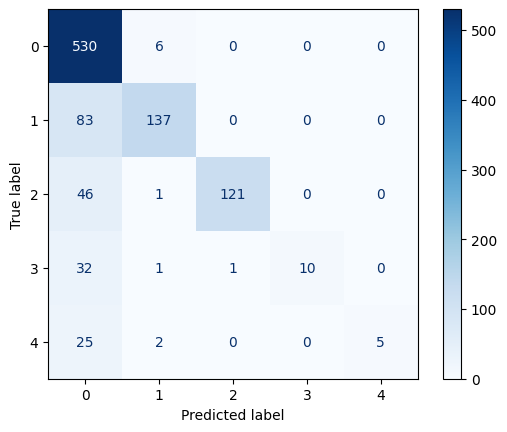

In [147]:
xgbmodel = XGBClassifier(n_estimators=100, learning_rate=0.01)
xgbmodel.fit(standarded_train_feats, train_labels)
xgb_predict = xgbmodel.predict(standarded_train_feats).argmax(1)

y_true = train_y
results_recall = recall_score(y_true, xgb_predict+1, average=None)
print("Test UAR(Unweighted Average Recall) :", results_recall.mean())
ConfusionMatrixDisplay(confusion_matrix(y_true, xgb_predict+1)).plot(cmap='Blues')

## generate csv output

## clustering models